# Support and Setup

## Relations matrix for tetrahedra
Omega is the relations matrix for a 4-punctured sphere.

In [2]:
# first do short edges around a puncture
omega_short_one_puncture = matrix([
    [ 0, 1,-1],
    [-1, 0, 1],
    [ 1,-1, 0]
])
omega_short = matrix.block_diagonal([omega_short_one_puncture]*4)

# columns are A_1, ... , A_6
omega_short_long = matrix([
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,0,1,1,0,0],
    #
    [0,0,1,0,0,1],
    [0,1,1,0,0,0],
    [0,1,0,0,0,1],
    #
    [0,1,0,0,1,0],
    [1,0,0,0,1,0],
    [1,1,0,0,0,0],
    #
    [1,0,0,0,0,1],
    [1,0,0,1,0,0],
    [0,0,0,1,0,1]
])



# columns are a_11,a_12,...,a_41,a_42,a_42, A_1, ... , A_6
omega = block_matrix([
    [omega_short,omega_short_long],
    [-omega_short_long.transpose(),0]
])

In [ ]:
omega

## Helper methods

In [3]:
import functools

# Get the short and long edges in vector form.
def short_edge(i,j,power=1):
    vec = [0]*18
    vec[3*(i-1)+j-1] = power
    return vec

def long_edge(i,power=1):
    vec = [0]*18
    vec[11+i] = power
    return vec

def std_basis(i,dim,power=1):
    # returns (0,...,0,power,0,...,0) in ZZ^dim
    vec = [0]*dim
    vec[i] = power
    return vector(vec)

# list + list is concatenation, here's a method to add lists termwise:
# needs the library functools for reduce.
def add_termwise(*args):
    return list(reduce(lambda x,y: vector(x)+vector(y), args))

# multiply_termwise(v,w) returns (v1*w1,...,vn*wn)
def multiply_termwise(*args):
    return reduce(lambda vec1, vec2: list(map(lambda x,y: x*y, vec1,vec2)), args)
    

def get_normal_ordering_power(term,relations=omega):
    # :ab: = q^{-n}:a: :b:, if ab = q^{2n}ba
    dim = len(vector(ZZ,term))
    scalar_power = 0
    for i in range(dim):
        if not (term[i].is_zero() or vector(term[i+1:]).is_zero()):
            leading_factor = vector([0]*dim)
            leading_factor[i] = term[i]
            trailing_terms = vector([0]*dim)
            trailing_terms[i+1:] = term[i+1:]
        
            scalar_power -= (matrix(leading_factor)*relations*matrix(trailing_terms).transpose())[0]
    return (scalar_power/2)[0]

def add_normal_ordering_scalar(list_of_terms,relations=omega):
    new_list_of_terms = list_of_terms
    for term in new_list_of_terms:
        term[0] += get_normal_ordering_power(term,relations)
    return new_list_of_terms

def dict_monomial_to_list(monomial):
    coeff = LaurentPolynomialRing(ZZ,'qrt4')(list(monomial.values())[0])
    if not coeff.is_monomial():
        raise Exception('I can only deal with coefficients in the form q^a')
    else:
        lattice_coord = list(list(monomial.keys())[0])
        lattice_coord[0] += coeff.degree()/2 # the coeff is in terms of qrt4, qrt4^4 = q
        return lattice_coord

In [ ]:
coeff_tmp = 'qrt4^3'
LaurentPolynomialRing(ZZ,'qrt4')

## Variables and spaces

In [4]:
# coefficients - helps translate from vectors to elements in the torus.

# a11,a12,a13,a21,a22,a23,a31,a32,a33,a41,a42,a43,A1,A2,A3,A4,A5,A6 = var('a11','a12','a13','a21','a22','a23','a31','a32','a33','a41','a42','a43','A1','A2','A3','A4','A5','A6');
# b11,b12,b13,b21,b22,b23,b31,b32,b33,b41,b42,b43,B1,B2,B3,B4,B5,B6 = var('b11','b12','b13','b21','b22','b23','b31','b32','b33','b41','b42','b43','B1','B2','B3','B4','B5','B6');
# x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6 = var('x1','x2','x3','x4','x5','x6','y1','y2','y3','y4','y5','y6','z1','z2','z3','z4','z5','z6','w1','w2','w3','w4','w5','w6')
R.<qrt4,a11,a12,a13,a21,a22,a23,a31,a32,a33,a41,a42,a43,A1,A2,A3,A4,A5,A6,b11,b12,b13,b21,b22,b23,b31,b32,b33,b41,b42,b43,B1,B2,B3,B4,B5,B6,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6> = LaurentPolynomialRing(ZZ) #[q,a11,a12,a13,a21,a22,a23,a31,a32,a33,a41,a42,a43,A1,A2,A3,A4,A5,A6,b11,b12,b13,b21,b22,b23,b31,b32,b33,b41,b42,b43,B1,B2,B3,B4,B5,B6,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6]
q = var('q')
qrt2 = var('qrt2')
q = qrt4^4
q = qrt2^2
qrt2 = qrt4^2

coeffs = matrix(R,[qrt2^2,a11,a12,a13,a21,a22,a23,a31,a32,a33,a41,a42,a43,A1,A2,A3,A4,A5,A6,b11,b12,b13,b21,b22,b23,b31,b32,b33,b41,b42,b43,B1,B2,B3,B4,B5,B6,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6])

Rnew.<qrt4,al21,al31,al01,al02,al32,al12,al30,al20,al10,al13,al23,al03,A03,A02,A12,A13,A01,A23,be21,be31,be01,be02,be32,be12,be30,be20,be10,be13,be23,be03,B03,B02,B12,B13,B01,B23,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6> =LaurentPolynomialRing(ZZ)
new_coeffs = matrix(Rnew,[qrt2^2,al21,al31,al01,al02,al32,al12,al30,al20,al10,al13,al23,al03,A03,A02,A12,A13,A01,A23,be21,be31,be01,be02,be32,be12,be30,be20,be10,be13,be23,be03,B03,B02,B12,B13,B01,B23,x1,x2,x3,x4,x5,x6,y1,y2,y3,y4,y5,y6,z1,z2,z3,z4,z5,z6,w1,w2,w3,w4,w5,w6])


In [5]:
# First q. The first lattice is in terms of qrt2 = q^(1/2)
gens_dict = {'q': vector([2] + [0]*18 + [0]*18 + [0]*24)}

# Then add edges for tet A
gens_dict.update({"a{0}{1}".format(i,j): vector([0] + short_edge(i,j) + [0]*18 + [0]*24) for i in range(1,5) for j in range(1,4)})
gens_dict.update({"A{0}".format(i) : vector([0] + long_edge(i) + [0]*18 + [0]*24) for i in range(1,7)})

# Edges for tet B
gens_dict.update({"b{0}{1}".format(i,j): vector([0] + [0]*18 + short_edge(i,j) + [0]*24) for i in range(1,5) for j in range(1,4)})
gens_dict.update({"B{0}".format(i) : vector([0] + [0]*18 + long_edge(i) + [0]*24) for i in range(1,7)})

# Finally the threads
gens_dict.update({"x{0}".format(i+1): vector([0] + [0]*18 + [0]*18 + list(std_basis(i+0 ,24))) for i in range(6)})
gens_dict.update({"y{0}".format(i+1): vector([0] + [0]*18 + [0]*18 + list(std_basis(i+6 ,24))) for i in range(6)})
gens_dict.update({"z{0}".format(i+1): vector([0] + [0]*18 + [0]*18 + list(std_basis(i+12,24))) for i in range(6)})
gens_dict.update({"w{0}".format(i+1): vector([0] + [0]*18 + [0]*18 + list(std_basis(i+18,24))) for i in range(6)})

lex_order_41 = list(gens_dict.keys())
lex_order_41[0] = 'qrt4'
# shorthand:
lat = gens_dict



In [6]:
# translating between new and old indices. these might change with the orientation convention for the tetrahedra
# { 'new' : ['old',sign] }
gens_map = {'q' : ['q',1],
                 'al21' : ['a11', 1],
                 'al31' : ['a12', 1],
                 'al01' : ['a13', 1],
                 'al02' : ['a21',1],
                 'al32' : ['a22',1],
                 'al12' : ['a23',1],
                 'al30' : ['a31',1],
                 'al20' : ['a32',1],
                 'al10' : ['a33',1],
                 'al13' : ['a41', 1],
                 'al23' : ['a42', 1],
                 'al03' : ['a43', 1],
                 'A03' : ['A1',1],
                 'A02' : ['A2',1],
                 'A12' : ['A3',1],
                 'A13' : ['A4',1],
                 'A01' : ['A5',1],
                 'A23' : ['A6',1],
                 'be21' : ['b11', 1],
                 'be31' : ['b12', 1],
                 'be01' : ['b13', 1],
                 'be02' : ['b21',1],
                 'be32' : ['b22',1],
                 'be12' : ['b23',1],
                 'be30' : ['b31',1],
                 'be20' : ['b32',1],
                 'be10' : ['b33',1],
                 'be13' : ['b41', 1],
                 'be23' : ['b42', 1],
                 'be03' : ['b43', 1],
                 'B03' : ['B1',1],
                 'B02' : ['B2',1],
                 'B12' : ['B3',1],
                 'B13' : ['B4',1],
                 'B01' : ['B5',1],
                 'B23' : ['B6',1],
                }

# include threads for safety.
gens_map.update({'{0}{1}'.format(th,i) : ['{0}{1}'.format(th,i),1] for th in ['x','y','z','w'] for i in range(1,7)})

def new_gens(new, translation=gens_map,old_lattice=gens_dict):
    old = translation[new]
    return old[1]*gens_dict[old[0]]


In [ ]:
#print(list(gens_dict.keys()))

for k,v in gens_dict.items():
        if not k == str((coeffs*vector(v))[0]):
            print(v)
            print(k, "and", str((coeffs*vector(v))[0])," don't agree")
            


# The 4_1 knot compelement

## Relations for the complement

### Thread relations

In [7]:
omega_x_threads = matrix(ZZ,[
    sum([vector(edge[1:18+18+1]) for edge in edges]) for edges in [
        [new_gens('al03'),new_gens('al23'),-new_gens('be02'),-new_gens('be32'),lat['A4'],lat['B3']],
        [new_gens('be02'),new_gens('be12'),-new_gens('al03'),-new_gens('al13'),lat['A6'],lat['B6']],
        [new_gens('al02'),new_gens('al12'),-new_gens('be03'),-new_gens('be13'),lat['A6'],lat['B6']],
        [new_gens('be03'),new_gens('be23'),-new_gens('al02'),-new_gens('al32'),lat['A3'],lat['B4']],
        [new_gens('al01'),new_gens('al31'),-new_gens('be01'),-new_gens('be21'),lat['A3'],lat['B4']],
        [new_gens('be01'),new_gens('be31'),-new_gens('al01'),-new_gens('al21'),lat['A4'],lat['B3']]
    ]
])

omega_y_threads = matrix(ZZ,[
    sum([vector(edge[1:18+18+1]) for edge in edges]) for edges in [
        [new_gens('be02'),new_gens('be32'),-new_gens('al13'),-new_gens('al23'),lat['A1'],lat['B3']],
        [new_gens('al03'),new_gens('al13'),-new_gens('be12'),-new_gens('be32'),lat['A6'],lat['B2']],
        [new_gens('be10'),new_gens('be30'),-new_gens('al02'),-new_gens('al12'),lat['A6'],lat['B2']],
        [new_gens('al12'),new_gens('al32'),-new_gens('be20'),-new_gens('be30'),lat['A2'],lat['B6']],
        [new_gens('be21'),new_gens('be31'),-new_gens('al10'),-new_gens('al30'),lat['A2'],lat['B5']],
        [new_gens('al10'),new_gens('al20'),-new_gens('be01'),-new_gens('be31'),lat['A1'],lat['B3']]
    ]
])

omega_z_threads = matrix(ZZ,[
    sum([vector(edge[1:18+18+1]) for edge in edges]) for edges in [
        [new_gens('al13'),new_gens('al23'),-new_gens('be23'),-new_gens('be03'),lat['A1'],lat['B4']],
        [new_gens('be23'),new_gens('be13'),-new_gens('al03'),-new_gens('al23'),lat['A4'],lat['B1']],
        [new_gens('al01'),new_gens('al21'),-new_gens('be10'),-new_gens('be20'),lat['A4'],lat['B1']],
        [new_gens('be20'),new_gens('be30'),-new_gens('al31'),-new_gens('al21'),lat['A5'],lat['B5']],
        [new_gens('al20'),new_gens('al30'),-new_gens('be21'),-new_gens('be31'),lat['A5'],lat['B5']],
        [new_gens('be01'),new_gens('be21'),-new_gens('al10'),-new_gens('al20'),lat['A1'],lat['B4']]
    ]
])

omega_w_threads = matrix(ZZ,[
    sum([vector(edge[1:18+18+1]) for edge in edges]) for edges in [
        [new_gens('be03'),new_gens('be13'),-new_gens('al12'),-new_gens('al32'),lat['A2'],lat['B6']],
        [new_gens('al02'),new_gens('al32'),-new_gens('be13'),-new_gens('be23'),lat['A3'],lat['B1']],
        [new_gens('be10'),new_gens('be20'),-new_gens('al01'),-new_gens('al31'),lat['A3'],lat['B1']],
        [new_gens('al21'),new_gens('al31'),-new_gens('be10'),-new_gens('be30'),lat['A5'],lat['B2']],
        [new_gens('be12'),new_gens('be32'),-new_gens('al20'),-new_gens('al30'),lat['A5'],lat['B2']],
        [new_gens('al10'),new_gens('al30'),-new_gens('be12'),-new_gens('be02'),lat['A2'],lat['B6']]
    ]
])

omega_threads = block_matrix([[omega_x_threads],[omega_y_threads],[omega_z_threads],[omega_w_threads]])

In [8]:
omega_threads_threads = matrix(ZZ,[
    # x1 - x6
    vector(new_gens('y1'))-vector(new_gens('z2')),
    vector(new_gens('y2'))-vector(new_gens('w6')),
    vector(new_gens('w1'))-vector(new_gens('y3')),
    vector(new_gens('w2'))-vector(new_gens('z1')),
    vector(new_gens('z6'))-vector(new_gens('w3')),
    vector(new_gens('z3'))-vector(new_gens('y6')),
    # y1 - y6
    vector(new_gens('z1'))-vector(new_gens('x1')),
    vector(new_gens('w5'))-vector(new_gens('x2')),
    vector(new_gens('x3'))-vector(new_gens('w4')),
    vector(new_gens('z4'))-vector(new_gens('w1')),
    vector(new_gens('w6'))-vector(new_gens('z5')),
    vector(new_gens('x6'))-vector(new_gens('z6')),
    # z1 - z6
    vector(new_gens('x4'))-vector(new_gens('y1')),
    vector(new_gens('x1'))-vector(new_gens('w2')),
    vector(new_gens('w3'))-vector(new_gens('x6')),
    vector(new_gens('w4'))-vector(new_gens('y4')),
    vector(new_gens('y5'))-vector(new_gens('w5')),
    vector(new_gens('y6'))-vector(new_gens('x5')),
    # w1 - w6
    vector(new_gens('y4'))-vector(new_gens('x3')),
    vector(new_gens('z2'))-vector(new_gens('x4')),
    vector(new_gens('x5'))-vector(new_gens('z3')),
    vector(new_gens('y3'))-vector(new_gens('z4')),
    vector(new_gens('z5'))-vector(new_gens('y2')),
    vector(new_gens('x2'))-vector(new_gens('y5'))
])[:,-24:]
# check that it's skew symmetric
omega_threads_threads.is_skew_symmetric()

True

In [ ]:
for v in omega_threads_threads.kernel().basis():
    #print out the kernel elements
    print(matrix(Rnew,v)*(new_coeffs[:,-24:]).transpose())

### Full relations matrix for the complement.

In [9]:
# Get the relations matrix, then its kernel
omega_41_with_q = block_diagonal_matrix(matrix([0]),block_matrix([[block_diagonal_matrix(omega,omega),-omega_threads.transpose()],[omega_threads,omega_threads_threads]]))
print("omega_41 is skew symmetric: ", omega_41_with_q.is_skew_symmetric())
kernel_41 = omega_41_with_q.kernel().basis()

print("Center is rank:", omega_41_with_q.right_kernel_matrix().rank())

omega_41 is skew symmetric:  True
Center is rank: 9


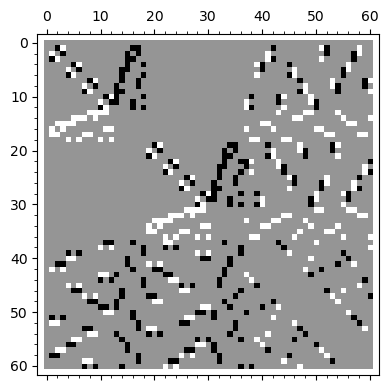

In [24]:
matrix_plot(omega_41_with_q)
#omega_41_with_q.rows()

## Taking invariants at gates.

The weight function $\mathbb{Z}^{61} \to \mathbb{Z}^{24}$ is given by a 24 by 61 matrix `weights_41`. Its right kernel is the invariant sublattice.

### Weight Matrix

In [10]:

# first keep track of the ordering on the vertices. Need this to make a basis.
vertex_index_list = [[k,i,j] for k in ['a','b'] for i in range(4) for j in range(4) if i != j]
vertex_dict = {'V{0}{1}{2}'.format(*vertex_index_list[i]) : std_basis(i,len(vertex_index_list)) for i in range(len(vertex_index_list)) }
#print(vertex_dict)

# order on rows is q,a11, a12,...,a43,A1,...,A6,b11,...,B6,x1,x2,...,y's,z's,w's
weights_41 = matrix(ZZ,[
    [0]*24,
    vertex_dict['Va21']-vertex_dict['Va31'], # a11 - al21
    vertex_dict['Va31']-vertex_dict['Va01'], # a12 - al31
    vertex_dict['Va01']-vertex_dict['Va21'], # a13 - al01
    vertex_dict['Va02']-vertex_dict['Va32'], # a21 - al02
    vertex_dict['Va32']-vertex_dict['Va12'], # a22 - al32
    vertex_dict['Va12']-vertex_dict['Va02'], # a23 - al12
    vertex_dict['Va30']-vertex_dict['Va20'], # a31 - al30
    vertex_dict['Va20']-vertex_dict['Va10'], # a32 - al20
    vertex_dict['Va10']-vertex_dict['Va30'], # a33 - al10
    vertex_dict['Va13']-vertex_dict['Va23'], # a41 - al13
    vertex_dict['Va23']-vertex_dict['Va03'], # a42 - al23
    vertex_dict['Va03']-vertex_dict['Va13'], # a43 - al03
    vertex_dict['Va10']+vertex_dict['Va23'], # A1 - A03
    vertex_dict['Va30']+vertex_dict['Va12'], # A2 - A02
    vertex_dict['Va32']+vertex_dict['Va01'], # A3 - A12
    vertex_dict['Va21']+vertex_dict['Va03'], # A4 - A13
    vertex_dict['Va20']+vertex_dict['Va31'], # A5 - A01
    vertex_dict['Va13']+vertex_dict['Va02'], # A6 - A23
    vertex_dict['Vb21']-vertex_dict['Vb31'], # b11 - be21
    vertex_dict['Vb31']-vertex_dict['Vb01'], # b12 - be31
    vertex_dict['Vb01']-vertex_dict['Vb21'], # b13 - be01
    vertex_dict['Vb02']-vertex_dict['Vb32'], # b21 - be02
    vertex_dict['Vb32']-vertex_dict['Vb12'], # b22 - be32
    vertex_dict['Vb12']-vertex_dict['Vb02'], # b23 - be12
    vertex_dict['Vb30']-vertex_dict['Vb20'], # b31 - be30
    vertex_dict['Vb20']-vertex_dict['Vb10'], # b32 - be20
    vertex_dict['Vb10']-vertex_dict['Vb30'], # b33 - be10
    vertex_dict['Vb13']-vertex_dict['Vb23'], # b41 - be13
    vertex_dict['Vb23']-vertex_dict['Vb03'], # b42 - be23
    vertex_dict['Vb03']-vertex_dict['Vb13'], # b43 - be03
    vertex_dict['Vb10']+vertex_dict['Vb23'], # B1 - B03
    vertex_dict['Vb30']+vertex_dict['Vb12'], # B2 - B02
    vertex_dict['Vb32']+vertex_dict['Vb01'], # B3 - B12
    vertex_dict['Vb21']+vertex_dict['Vb03'], # B4 - B13
    vertex_dict['Vb20']+vertex_dict['Vb31'], # B5 - B01
    vertex_dict['Vb13']+vertex_dict['Vb02'], # B6 - B23
    # x1,...,x6
    vertex_dict['Vb32']-vertex_dict['Va03'],
    vertex_dict['Va13']-vertex_dict['Vb02'],
    vertex_dict['Vb13']-vertex_dict['Va02'],
    vertex_dict['Va32']-vertex_dict['Vb03'],
    vertex_dict['Vb21']-vertex_dict['Va01'],
    vertex_dict['Va21']-vertex_dict['Vb01'],
    # y1,...,y6
    vertex_dict['Va23']-vertex_dict['Vb32'],
    vertex_dict['Vb12']-vertex_dict['Va13'],
    vertex_dict['Va02']-vertex_dict['Vb30'],
    vertex_dict['Vb20']-vertex_dict['Va12'],
    vertex_dict['Va30']-vertex_dict['Vb31'],
    vertex_dict['Vb01']-vertex_dict['Va10'],
    # z1,...,z6
    vertex_dict['Vb03']-vertex_dict['Va23'],
    vertex_dict['Va03']-vertex_dict['Vb23'],
    vertex_dict['Vb10']-vertex_dict['Va21'],
    vertex_dict['Va31']-vertex_dict['Vb20'],
    vertex_dict['Vb31']-vertex_dict['Va20'],
    vertex_dict['Va10']-vertex_dict['Vb21'],
    # w1,...,w6
    vertex_dict['Va12']-vertex_dict['Vb13'],
    vertex_dict['Vb23']-vertex_dict['Va32'],
    vertex_dict['Va01']-vertex_dict['Vb10'],
    vertex_dict['Vb30']-vertex_dict['Va31'],
    vertex_dict['Va20']-vertex_dict['Vb12'],
    vertex_dict['Vb02']-vertex_dict['Va30']
]).transpose()


In [ ]:
# Looking at the center of the torus. These elements should all be weight zero!
print("center is rank ",len(kernel_41))
for v in kernel_41:
    #print out the kernel elements
    print(matrix(Rnew,v)*new_coeffs.transpose())
    if not (weights_41*v).is_zero():
        print(weights_41*v)
    


In [125]:
# Scratch - looking for the relationship between the weight matrix and the relations matrix
print("weights dims:", weights_41.dimensions(), ", relations dims:",omega_41_with_q.dimensions())
print((weights_41*omega_41_with_q*(weights_41.transpose())).str())

weights dims: (24, 61) , relations dims: (61, 61)
[  0  -1   1  -1   1   0  -1  10   0   0  -9   0   0   0   0  -1   0   0   2   0   0   0  -1   0]
[  1   0  -1   0 -10   0   0   0   1  -1   1   9   0   0   0   1   0   1   0   0  -2   0   0   0]
[ -1   1   0  -1   0   9   0   0 -10   0   1   1   0   0   0   0  -2   1   0   0   0   0   0   1]
[  1   0   1   0   1  -1  -9  -1   0   9  -1   0   1  -1   0   0   1   0   0  -1   0   0   0   0]
[ -1  10   0  -1   0   1   1   0   0   0  -1  -9   0  -1   2  -1   0  -2   1   0   0   0   1   0]
[  0   0  -9   1  -1   0  -1  -1   9   1   0   1   0  -1  -1   0   1   0   0   0   1   0   0   0]
[  1   0   0   9  -1   1   0  -1   1 -10   0   0  -2   0   0   0   0   0   0   0   0   0   1   1]
[-10   0   0   1   0   1   1   0  -1   0   9  -1   0   0   0   1   0   0   0   0   0  -2   1   0]
[  0  -1  10   0   0  -9  -1   1   0   1   0  -1   0   2   0   0   0  -1   0   0   0   0   0  -1]
[  0   1   0  -9   0  -1  10   0  -1   0   1  -1   0   0   0   0   0

In [124]:
print((weights_41*(weights_41.transpose())).str())

[ 5  0  0  0  0  0  0 -1  0  0 -1  1  0  0  0 -1  0  0  0 -1  0  0  0  0]
[ 0  5  0  0 -1  1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0 -1  0  0]
[ 0  0  5  0  0 -1  0  1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1]
[ 0  0  0  5  0  0 -1  0  1 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0]
[ 0 -1  0  0  5  0  0  0  0  1  0 -1  0  0  0  0  0 -1 -1  0  0  0  0  0]
[ 0  1 -1  0  0  5  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  5  0  0 -1  1  0  0  0  0  0 -1  0  0  0  0  0 -1  0]
[-1  0  1  0  0  0  0  5  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0]
[ 0  0 -1  1  0 -1  0  0  5  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0 -1  1  0 -1  0  0  5  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0]
[-1  0  0  0  0  0  1 -1  0  0  5  0  0  0  0  0  0  0 -1  0  0 -1  0  0]
[ 1 -1  0  0 -1  0  0  0  0  0  0  5  0  0 -1  0  0  0  0  0 -1  0  0  0]
[ 0  0  0 -1  0  0  0 -1  0  0  0  0  5  0  0  0  0  0  0 -1  0  0 -1  1]
[ 0  0  0  0  0 -1  0  0  0 -1  0  0  

In [94]:
print(matrix(weights_41*lat['z2'])*(weights_41*lat['x1']))
#print(coeffs*(lat['a11']*(weights_41.transpose()*weights_41-2*matrix.identity(61))))
#print(coeffs*(lat['a11']*(weights_41.transpose()*weights_41)))
for i in range(61-24,61):
    th = std_basis(i,61)
    print((new_coeffs*th)[0],":", (new_coeffs[:,-24:])*((th*(weights_41.transpose()*weights_41-2*matrix.identity(61)))[-24:]))


(-1)
x1 : (-y1 - z2)
x2 : (-y2 - w6)
x3 : (-y3 - w1)
x4 : (-z1 - w2)
x5 : (-z6 - w3)
x6 : (-y6 - z3)
y1 : (-x1 - z1)
y2 : (-x2 - w5)
y3 : (-x3 - w4)
y4 : (-z4 - w1)
y5 : (-z5 - w6)
y6 : (-x6 - z6)
z1 : (-x4 - y1)
z2 : (-x1 - w2)
z3 : (-x6 - w3)
z4 : (-y4 - w4)
z5 : (-y5 - w5)
z6 : (-x5 - y6)
w1 : (-x3 - y4)
w2 : (-x4 - z2)
w3 : (-x5 - z3)
w4 : (-y3 - z4)
w5 : (-y2 - z5)
w6 : (-x2 - y5)


In [11]:
# The right kernel is the sublattice of invariants with respect to the T-action at all 24 gates.
invariant_sublattice_41 = weights_41.right_kernel()
print("Rank of invariant sublattice:", invariant_sublattice_41.rank())

for v in invariant_sublattice_41.basis():
    #print out the kernel elements
    print(matrix(Rnew,v)*new_coeffs.transpose())

Rank of invariant sublattice: 37
[qrt4^4]
[al21 - be10 + z3 - w4]
[al31 + be10 + w3 + w4]
[al01 - z3 - w3]
[al02 + be03 + x4 - y3 - y4 - z4 - w1 - w4]
[al32 - be03 - x4 + w1]
[al12 + y3 + y4 + z4 + w4]
[al30 - y5 - z5]
[al20 - be03 + B13 - B23 + y5 + z5 + z6 + w6]
[al10 + be03 - B13 + B23 - z6 - w6]
[al13 - be10 + B13 - B23 + x6 + y2 - y4 + y5 + y6 - z1 + z3 - z4 + z5 + z6 - w1 - w4 + w5 + w6]
[al23 + x4 + z1 + z2 + w2]
[al03 + be10 - B13 + B23 - x4 - x6 - y2 + y4 - y5 - y6 - z2 - z3 + z4 - z5 - z6 + w1 - w2 + w4 - w5 - w6]
[A03 - B13 + z1 - z6]
[A02 - B23 - w1 + w6]
[A12 - B13 - x4 - x6 - y6 - z3 - z6 - w3]
[A13 - B13 - x4 - x6 - y6 - z2 - z6 - w2]
[A01 - B23 - y4 + y5 - z4 + z5 - w1 + w6]
[A23 - B23 + y2 - y3 - y4 + y5 - z4 + z5 - w1 - w4 + w5 + w6]
[be21 + be03 - B13 + B23 - y5 - w6]
[be31 - be03 + B13 - B23 + y5 + y6 + z6 + w6]
[be01 - y6 - z6]
[be02 - be10 + B13 - B23 + x6 - y1 - y4 + y6 - z1 + z3 - z4 + z6 - w1 - w4]
[be32 + be10 - B13 + B23 - x6 + y1 + y4 - y5 - y6 + z1 - z3 + z

## Quotients

Any quotient of the form $M^{x} = 1$ in the quantum torus can be expressed in terms of the lattice as $x = 0$. We want to quotient by
1. Monodromy at each of the 8 punctures
1. The gluing constraints, 6 from each face so 24 total.
1. Monodromy around the long edge handles - looks like there are 2 from each edge so 4 total.
1. The great circle relations, 1 from each tetrahedron so 2 total.

The first three types of relations are monomial. I expect to get a lattice of rank 3 once those are imposed. The last relation will have to be done in terms of the quantum torus, not the lattice.


### Quotient by kernel (scratch)

In [ ]:
#quotient_by_kernel_41 = invariant_sublattice_41.quotient(kernel_41)
#print("Dimension of invariant sublattice quotient by central elements:", quotient_by_kernel_41.ngens())
#W = quotient_by_kernel_41.W()
#V = quotient_by_kernel_41.V()
#pi = (V/W).quotient_map()
#for g in (V/W).gens():
#    print(coeffs*vector(R,list((V/W).lift(g))))

### Monodromy and Gluing Quotients

In [12]:
%run ../quantum_tori.ipynb

In [13]:
# We'll want to check what's in the kernel:
#kernel_space_41 = invariant_sublattice_41.subspace(kernel_41)

# Make the gluing constraints in a form where the power of q is tracked properly:
qrt2 = qrt4^2

list_of_gluing_constraints_41 = [ # first short edges. The loop is q^(-1) x2 a11 x1 b43 and set equal to q^(-1)
    # the order depends on the orientation around the loop.
    dict_monomial_to_list(constraint) for constraint in [
        scale_polynomial(multiply_lattice_monomials(new_gens(thread1),new_gens(edgeA),new_gens(thread2),new_gens(edgeB),relations=omega_41_with_q),q^(0))
        for thread1,edgeA,thread2,edgeB in [
            ('x2','al03','x1','be02'),
            ('x4','al02','x3','be03'),
            ('x6','al01','x5','be01'),
            ('y1','al13','y2','be32'),
            ('y3','al12','y4','be30'),
            ('y5','al10','y6','be31'),
            ('z2','al23','z1','be23'),
            ('z4','al21','z3','be20'),
            ('z6','al20','z5','be21'),
            ('w1','al32','w2','be13'),
            ('w3','al31','w4','be10'),
            ('w5','al30','w6','be12')
        ]
    ]
] + [ # then long edges. These get set to 1. It's :x2 A4:(:x3 B6:)^{-1} = 1.
    dict_monomial_to_list(constraint) for constraint in [ 
        multiply_polynomials({ tuple(new_gens(thread1)+new_gens(edgeA)):1 },{tuple(-new_gens(thread2)-new_gens(edgeB)):1},relations=omega_41_with_q)
        for thread1,edgeA,thread2,edgeB in [
            ('x2','B23','x3','A23'),
            ('x4','B13','x5','A12'),
            ('x6','B12','x1','A13'),
            ('y2','A23','y3','B02'),
            ('y4','A02','y5','B01'),
            ('y6','A03','y1','B12'),
            ('z2','B03','z3','A13'),
            ('z4','B01','z5','A01'),
            ('z6','B13','z1','A03'),
            ('w2','A12','w3','B03'),
            ('w4','A01','w5','B02'),
            ('w6','A02','w1','B23')
        ]
    ]
]

# check that these are T^{24}-invariant and central:
print("Checking Gluing Constraints:")
for constraint in list_of_gluing_constraints_41:
    v = weights_41*vector(constraint)
    if not v.is_zero():  print("Not Invariant!:", new_coeffs*matrix(Rnew,constraint).transpose())
#    if not (invariant_sublattice_41.subspace([constraint])).is_subspace(kernel_space_41): print("Not in kernel:", constraint)


# Monodromy: The loop around the puncture is q^(-1/2) a1p a2p a3p. If it's set to q^(-1/2), then I need to quotient by ap1 ap2 ap3 = q^(0)
    
list_of_monodromy_constraints_41 = [ dict_monomial_to_list(constraint) for constraint in [ 
    scale_polynomial(multiply_lattice_monomials(new_gens(edge1),new_gens(edge2),new_gens(edge3),relations=omega_41_with_q),q^(0))
    for edge1,edge2,edge3 in [
            ('al10','al20','al30'),
            ('al01','al21','al31'),
            ('al02','al12','al32'),
            ('al03','al13','al23'),
            ('be10','be20','be30'),
            ('be01','be21','be31'),
            ('be02','be12','be32'),
            ('be03','be13','be23'),
        ]
    ]
]

# check that these are T^{24}-invariant
print("Checking Monodromy Constraints:")
for constraint in list_of_monodromy_constraints_41:
    v = weights_41*vector(constraint)
    if not v.is_zero():  print("Not Invariant!:", new_coeffs*matrix(Rnew,constraint).transpose())
    # to check if they're central. I don't think they should be.
    #if not (invariant_sublattice_41.subspace([constraint])).is_subspace(kernel_space_41): print("Not in kernel:", constraint)
    
# Take the quotient!
#quotient_41 = invariant_sublattice_41.quotient(list_of_monodromy_constraints_41+list_of_gluing_constraints_41)

#print("Ambient space dimensions:",invariant_sublattice_41.dimension())
#print("Constraint space dimensions:",invariant_sublattice_41.subspace(list_of_monodromy_constraints_41+list_of_gluing_constraints_41).dimension())
#print("Quotient ngens:",quotient_41.ngens())

Checking Gluing Constraints:
Checking Monodromy Constraints:


In [ ]:
# Checking q-powers for the long edge thread relations
A = [0] + long_edge(6,1)+long_edge(3,0)+[0]*24
th1 = [0] + long_edge(6,0)+long_edge(3,0)+list(y4vec)
B = [0] + long_edge(6,0)+long_edge(3,1)+[0]*24
th2 = [0] + long_edge(6,0)+long_edge(3,0)+list(y5vec)

def multiply(m,n,relations=omega_41_with_q):
    q_power = (vector(m)*relations*matrix(n).transpose())[0]
    return add_termwise([q_power]+[0]*(18+18+24),m,n)



print(matrix(multiply(A,th1))*coeffs.transpose())
print(matrix(multiply(B,th2))*coeffs.transpose())
print(matrix(multiply(multiply(A,th1),multiply(-vector(th2),-vector(B))))*coeffs.transpose())

print(matrix(multiply([0]+short_edge(1,3)+[0]*(18+24),multiply([0]+short_edge(1,2)+[0]*(18+24),[0]+short_edge(1,1)+[0]*(18+24))))*coeffs.transpose())
print(get_normal_ordering_power([0]+short_edge(1,1)+short_edge(4,3)+list(x2vec+x1vec),omega_41_with_q))
# b43 x1 a11 x2
print(multiply(multiply([0] + [0]*18+short_edge(4,3)+[0]*24,[0] + [0]*36+list(x1vec)),multiply([0] + short_edge(1,1)+[0]*18+[0]*24,[0] + [0]*36+list(x2vec))))
# b43 x1 x2 a11
print(multiply(multiply([0] + [0]*18+short_edge(4,3)+[0]*24,[0] + [0]*36+list(x1vec)),multiply([0] + [0]*36+list(x2vec),[0] + short_edge(1,1)+[0]*18+[0]*24)))
# a11 x2 x1 b43
print(multiply(multiply([0] + short_edge(1,1)+[0]*18+[0]*24,[0] + [0]*36+list(x2vec)),multiply([0] + [0]*36+list(x1vec),[0]+[0]*18 + short_edge(4,3)+[0]*24)))

### Full Quotient!
We expect this to have three generators.

In [14]:
%run ../quantum_tori.ipynb
list_of_thread_monodromy_constraints_41 = [ # the loop is q^(-1/2)(threads in ccw order) -> q^(-1/2)
    dict_monomial_to_list(constraint) for constraint in [
        scale_polynomial(multiply_lattice_monomials(*[lat[e] for e in edges],relations=omega_41_with_q),1)
        for edges in [
            ('x1', 'x4', 'y1', 'z1', 'z2', 'w2'),
            ('x2', 'y2', 'y5', 'z5', 'w5', 'w6'),
            ('x3', 'y3', 'y4', 'z4', 'w1', 'w4'),
            ('x5', 'x6', 'y6', 'z3', 'z6', 'w3')
        ]
    ]
]

# check that these are T^{24}-invariant 
for constraint in list_of_thread_monodromy_constraints_41:
    v = weights_41*vector(constraint)
    if not v.is_zero():  print("Not Invariant!:", constraint)
        
full_quotient_41 = invariant_sublattice_41.quotient(list_of_gluing_constraints_41+list_of_monodromy_constraints_41+list_of_thread_monodromy_constraints_41)
print("Full (threads+monodromy+gluing) quotient ngens: ", full_quotient_41.ngens())

pi = full_quotient_41.coerce_map_from(full_quotient_41.V())
for g in full_quotient_41.gens():
    print(new_coeffs*vector(Rnew,list(g.lift())))

    

Full (threads+monodromy+gluing) quotient ngens:  3
(al21 - be10 + z3 - w4)
(al20 - be03 + B13 - B23 + y5 + z5 + z6 + w6)
(al13 - be10 + B13 - B23 + x6 + y2 - y4 + y5 + y6 - z1 + z3 - z4 + z5 + z6 - w1 - w4 + w5 + w6)


In [ ]:
# lets print all the constraints
# All of the T-region monodromy constraints should be set to qdim(1). 
print("thread monodromy.")
for constraint in list_of_thread_monodromy_constraints_41:
    print(new_coeffs*vector(Rnew,constraint))
    
print("monodromy.")
for constraint in list_of_monodromy_constraints_41:
    print(new_coeffs*vector(Rnew,constraint))
    
print("gluing.")
for constraint in list_of_gluing_constraints_41:
    print(new_coeffs*vector(Rnew,constraint))

### The great circles

These are *not* monomials, so I can't take the quotient using the lattice. Here I translate each term into the lattice though, to see if they'll simplify.

In [ ]:
%run ../quantum_tori.ipynb

In [15]:
def list_to_module_element(the_list,the_module):
    """
    Turns a list into a module element.
    Plays the role that the_module.monomial() would if it were implemented.
    
    Parameters:
    the_list (List) - the lattice coordinate of a module element.
    the_module (fgp_module) - the ambient module
    
    Returns:
    (the_module.element_class) - the module element you'd *expect* from typing the_module(the_list)
    """
    return the_module.sum([
        term[0]*term[1] for term in zip(the_list,the_module.gens())
    ])

In [16]:
### Generators for the glued surface!

# we want to generate the lattice and have determinant +1 for the basis matrix
extra_gen = list_to_module_element([0,-1,0],full_quotient_41).lift()
# some sanity checks on the extra generator:
if not (weights_41*vector(extra_gen)).is_zero():
    print("weight of extra generator:",weights_41*extra_gen)

print("extra_gen in quotient:",pi(extra_gen))

m_gen = vector(dict_monomial_to_list(
    multiply_lattice_monomials(
        *[new_gens(edge) for edge in ['x1','al03','al13','y1']],
        relations=omega_41_with_q
    )))

if not (weights_41*vector(m_gen)).is_zero():
    print("weight of m:",weights_41*m_gen)
    
print("m_gen in quotient:",pi(m_gen))

l_gen = dict_monomial_to_list(scale_polynomial(
    multiply_lattice_monomials(
        *[new_gens(edge) for edge in ['z2','al23','al13','y2','w5','z5','be21','be01','x6','z3','be20','be30','y3','x3','be03','be23']],
        relations=omega_41_with_q
    ),q^(-1/2)))
if not (weights_41*vector(l_gen)).is_zero():
    print("weight of l:",weights_41*vector(l_gen))
    
print("l_gen in quotient:",pi(l_gen))


favorite_basis_matrix = matrix([
    pi(m_gen),
    pi(l_gen),
    pi(extra_gen)
]).transpose()

if favorite_basis_matrix.determinant() != 1:
    print("WARNING: favorite_basis_matrix has determinant:",favorite_basis_matrix.determinant())
    
    
print("Commutation Relations in the quotient. These are in terms of q^(1/2).") # this is assuming that the quotient preserves the commutation relations.
omega_quotient = matrix([m_gen,l_gen,extra_gen])*omega_41_with_q*matrix([m_gen,l_gen,extra_gen]).transpose()
print(omega_quotient)

tmp_omega = (omega_41_with_q*matrix([m_gen,l_gen]).transpose())
#TODO - is there something that commutes with the m and l that I could use as the third generator?

extra_gen in quotient: (0, -1, 0)
m_gen in quotient: (1, 0, 0)
l_gen in quotient: (1, -1, 1)
Commutation Relations in the quotient. These are in terms of q^(1/2).
[ 0 -2  0]
[ 2  0 -2]
[ 0  2  0]


In [37]:
m_gen

(4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [17]:
scafolding_edges_A = -1*(new_gens('A03')+new_gens('A02')+new_gens('A12')+new_gens('A13'))
scafolding_edges_B = -1*(new_gens('B03')+new_gens('B02')+new_gens('B12')+new_gens('B13'))

# Define the great circles as dictionaries. These should be set to q + q^(-1)?

temp_list_A = [
    scale_polynomial( multiply_lattice_monomials(
        *[scafolding_edges_A,*edges],
        relations=omega_41_with_q
    ), q^q_power) for edges,q_power in [
                 # 0010
                 ([lat['A1'],-lat['a33'],lat['A1'],-lat['a42'],-lat['a22'],lat['A3'],lat['A3'],-lat['a13']],1),
                 # 0110
                 ([lat['a23'],lat['A6'],-lat['a41'],lat['A1'],-lat['a42'],lat['a31'],lat['A5'],-lat['a12'],lat['A3'],-lat['a13']],0),
                 #0011
                 ([lat['A1'],-lat['a33'],  lat['a11'],lat['A5'],-lat['a32'],  -lat['a22'],lat['A3'],  lat['a43'],lat['A6'],-lat['a21']],0),
                 # 0111
                 ([lat['a23'],lat['A6'],-lat['a41'],  lat['a11'],lat['A5'],-lat['a32'], lat['a31'],lat['A5'],-lat['a12'],  lat['a43'],lat['A6'],-lat['a21']],-1),
                 # 1101
                 ([lat['a13'],lat['A4'],  lat['a42'],lat['A4'],  lat['a22'],lat['A2'],  lat['a33'],lat['A2']],-1),
                 # 0101
                 ([lat['a13'],lat['A4'],  lat['a11'],lat['A5'],-lat['a32'],  lat['a22'],lat['A2'],  lat['a23'],lat['A6'],-lat['a41']],0),
                 # 1111
                 ([lat['a43'],lat['A6'],-lat['a21'],  lat['a42'],lat['A4'],  lat['a31'],lat['A5'],-lat['a12'],  lat['a33'],lat['A2']],-2)
] ]



great_circle_A = add_polynomials(*temp_list_A)
print("Great Circle:")
pretty_print(dict_to_free_algebra_element(great_circle_A, lex_order=lex_order_41,free_algebra=R))
    
great_circle_quot_A = add_polynomials(
    *[{tuple(favorite_basis_matrix*pi(k).vector()):v} for k,v in great_circle_A.items()]
)

great_circle_B = {}

temp_list_B = [
    scale_polynomial( multiply_lattice_monomials(
        *[scafolding_edges_B,*edges],
        relations=omega_41_with_q
    ), q^q_power) for edges,q_power in [
                 # 0010
                 ([lat['B1'],-lat['b33'],lat['B1'],-lat['b42'],-lat['b22'],lat['B3'],lat['B3'],-lat['b13']],1),
                 # 0110
                 ([lat['b23'],lat['B6'],-lat['b41'],lat['B1'],-lat['b42'],lat['b31'],lat['B5'],-lat['b12'],lat['B3'],-lat['b13']],0),
                 #0011
                 ([lat['B1'],-lat['b33'],  lat['b11'],lat['B5'],-lat['b32'],  -lat['b22'],lat['B3'],  lat['b43'],lat['B6'],-lat['b21']],0),
                 # 0111
                 ([lat['b23'],lat['B6'],-lat['b41'],  lat['b11'],lat['B5'],-lat['b32'], lat['b31'],lat['B5'],-lat['b12'],  lat['b43'],lat['B6'],-lat['b21']],-1),
                 # 1101
                 ([lat['b13'],lat['B4'],  lat['b42'],lat['B4'],  lat['b22'],lat['B2'],  lat['b33'],lat['B2']],-1),
                 # 0101
                 ([lat['b13'],lat['B4'],  lat['b11'],lat['B5'],-lat['b32'],  lat['b22'],lat['B2'],  lat['b23'],lat['B6'],-lat['b41']],0),
                 # 1111
                 ([lat['b43'],lat['B6'],-lat['b21'],  lat['b42'],lat['B4'],  lat['b31'],lat['B5'],-lat['b12'],  lat['b33'],lat['B2']],-2)
    ] ]

great_circle_B = add_polynomials(*temp_list_B)

great_circle_quot_B = add_polynomials(
    *[{tuple(favorite_basis_matrix*pi(k).vector()):v} for k,v in great_circle_B.items()]
)



Great Circle:
1/qrt4^8*a13^-1*a22^-1*a33^-1*a42^-1*A1*A2^-1*A3*A4^-1 + qrt4^4*a12^-1*a13^-1*a23*a31*a41^-1*a42^-1*A2^-1*A4^-1*A5*A6 + 1*a11*a21^-1*a22^-1*a32^-1*a33^-1*a43*A2^-1*A4^-1*A5*A6 + qrt4^12*a11*a12^-1*a21^-1*a23*a31*a32^-1*a41^-1*a43*A1^-1*A2^-1*A3^-1*A4^-1*A5^2*A6^2 + qrt4^20*a13*a22*a33*a42*A1^-1*A2*A3^-1*A4 + qrt4^20*a11*a13*a22*a23*a32^-1*a41^-1*A1^-1*A3^-1*A5*A6 + qrt4^12*a12^-1*a21^-1*a31*a33*a42*a43*A1^-1*A3^-1*A5*A6


qrt4^20*a13*a22*a33*a42*A1^-1*A2*A3^-1*A4 + qrt4^20*a11*a13*a22*a23*a32^-1*a41^-1*A1^-1*A3^-1*A5*A6 + qrt4^12*a12^-1*a21^-1*a31*a33*a42*a43*A1^-1*A3^-1*A5*A6 + qrt4^12*a11*a12^-1*a21^-1*a23*a31*a32^-1*a41^-1*a43*A1^-1*A2^-1*A3^-1*A4^-1*A5^2*A6^2 + qrt4^4*a12^-1*a13^-1*a23*a31*a41^-1*a42^-1*A2^-1*A4^-1*A5*A6 + a11*a21^-1*a22^-1*a32^-1*a33^-1*a43*A2^-1*A4^-1*A5*A6 + qrt4^-8*a13^-1*a22^-1*a33^-1*a42^-1*A1*A2^-1*A3*A4^-1

In [21]:
Qq.<qrt4> = FractionField(QQ['qrt4'])
var('q')
q = qrt4^4

quotient_free_algebra = FreeAlgebra(Qq,['m','l','g'])
quotient_poly_algebra = LaurentPolynomialRing(Qq,['m','l','g'])
classical_poly_algebra = LaurentPolynomialRing(QQ,['m','l','g'])
quotient_lex_order = ['m','l','g']

# Add -q^(1/2) - q^(-1/2) and turn into an element of the laurent polynomial ring.
print("Circle A:")
relation_A = quotient_poly_algebra.sum([
    quotient_poly_algebra(v)*quotient_poly_algebra.monomial(*k) for k,v in great_circle_quot_A.items()
]+[-qrt4^2 + -qrt4^(-2)])
pretty_print(relation_A)

print("Circle B:")
relation_B = quotient_poly_algebra.sum([
    quotient_poly_algebra(v)*quotient_poly_algebra.monomial(*k) for k,v in great_circle_quot_B.items()
]+[-qrt4^2 - qrt4^(-2)])
pretty_print(relation_B)

# ideal:

relations_ideal = quotient_poly_algebra.ideal([relation_A,relation_B])

Circle A:


qrt4^12*m^-1*l^3*g^-1 + (qrt4^4 + 1)*l + 1/qrt4^8*m*l^-1*g + (qrt4^20 + qrt4^12)*m^-1*l^2*g^-1 + (-qrt4^4 - 1)/qrt4^2 + qrt4^20*m^-1*l*g^-1

Circle B:


qrt4^12*m^4*l^3*g^-2 + (qrt4^20 + qrt4^12)*m^3*l^2*g^-1 + qrt4^20*m^2*l + (qrt4^4 + 1)*m*l*g^-1 + (-qrt4^4 - 1)/qrt4^2 + 1/qrt4^8*m^-2*l^-1

In [24]:
relation_A, relation_B


(qrt4^12*m^-1*l^3*g^-1 + (qrt4^4 + 1)*l + 1/qrt4^8*m*l^-1*g + (qrt4^20 + qrt4^12)*m^-1*l^2*g^-1 + (-qrt4^4 - 1)/qrt4^2 + qrt4^20*m^-1*l*g^-1,
 qrt4^12*m^4*l^3*g^-2 + (qrt4^20 + qrt4^12)*m^3*l^2*g^-1 + qrt4^20*m^2*l + (qrt4^4 + 1)*m*l*g^-1 + (-qrt4^4 - 1)/qrt4^2 + 1/qrt4^8*m^-2*l^-1)

### Set q->1 to get the classical expression.

In [25]:
# I want to compare to the q=1 case.
f = Qq.hom(1,QQ) # map sending qrt4 -> 1.

classical_relation_A = relation_A.map_coefficients(f)
    
classical_relation_B = relation_B.map_coefficients(f)

print("Classical relations:")
print(classical_relation_A)
print(classical_relation_B)

Classical relations:
m^-1*l^3*g^-1 + 2*l + m*l^-1*g + 2*m^-1*l^2*g^-1 - 2 + m^-1*l*g^-1
m^4*l^3*g^-2 + 2*m^3*l^2*g^-1 + m^2*l + 2*m*l*g^-1 - 2 + m^-2*l^-1


In [26]:
classical_relation_A.factor()

(m^-1*l^-1*g^-1) * (l^4 + 2*m*l^2*g + m^2*g^2 + 2*l^3 - 2*m*l*g + l^2)

### Searching for the A-polynomial - scratch

In [85]:
# short names for convenience
r1 = classical_relation_A
r2 = classical_relation_B

pretty_print(r1.factor())
pretty_print(r2.factor())

classical_poly_algebra.ideal([r1,r2]).groebner_basis()

(m^-1*l^-1*g^-1) * (l^4 + 2*m*l^2*g + m^2*g^2 + 2*l^3 - 2*m*l*g + l^2)

(m^-2*l^-1*g^-2) * (m^6*l^4 + 2*m^5*l^3*g + m^4*l^2*g^2 + 2*m^3*l^2*g - 2*m^2*l*g^2 + g^2)

(m^8*l^3 - m^8*g^2 - 2*m^6*l^3 + 2*m^7*l*g + 2*m^5*l^3*g + m^6*l*g^2 - m^6*l^2 + m^4*l^2*g^2 + 2*m^5*l*g + 2*m^3*l^2*g - 2*m^4*g^2 - 2*m^2*l*g^2 - l^3 - 2*m*l*g - 2*l^2 + 2*m*g + g^2 - l,
 m^9*l*g - 3/2*m^8*l^2 + 2*m^8*g^2 - 3*m^7*l*g - m^5*l^3*g - 2*m^6*l*g^2 - 2*m^5*l^2*g + 1/2*m^6*g^2 - 2*m^4*l^3 - 5*m^5*l*g - 4*m^4*l^2 + m^5*g + 2*m^3*l^2*g + 4*m^4*g^2 - 2*m^4*l + m^2*l^3 + 6*m^3*l*g + 2*m^2*l^2 + m^2*l + 2*l^3 + 3*m*l*g + 7/2*l^2 - 7*m*g + l - 1/2,
 m^9*g^2 + 6*m^7*l^3 - 2*m^8*l*g - 2*m^6*l^3*g - 4*m^7*l*g^2 + m^7*l^2 + 8*m^6*l^2*g - m^5*l^2*g^2 - 2*m^6*g^3 + 4*m^5*l*g^2 - 2*m^4*l^2*g - 4*m^5*g^2 + 8*m^4*l*g - 4*m^2*l^3*g - 6*m^3*l*g^2 - 8*m^2*l^2*g - 4*m^2*l*g + 2*l^2*g + 3*m*g^2 + 4*l*g + 2*g,
 m^7*l^2*g + 1/2*m^8*g^2 + m^6*l^3 - m^7*l*g - m^5*l^3*g + 1/2*m^6*l^2 - 1/2*m^4*l^2*g^2 - m^3*l^2*g + m^2*l*g^2 - 1/2*g^2,
 l^4 + 2*m*l^2*g + m^2*g^2 + 2*l^3 - 2*m*l*g + l^2)

In [ ]:
# Check that all the terms in the great circles are invariant.
for k in great_circle_A.keys():
    if not (weights_41*matrix(k).transpose()).is_zero():
        print("Not invariant:", k)
        
for k in great_circle_B.keys():
    if not (weights_41*matrix(k).transpose()).is_zero():
        print("Not invariant:", k)

In [ ]:
#import sage.rings.polynomial.laurent_polynomial_ideal
#TODO: Figure out how to make ideals in a laurent polynomial ring!
Rquot.<M,L,G> = PolynomialRing(QQ,3) # Order of variables here informs the Groebner basis.
M,L,G = var('M','L','G')

In [ ]:
# I'm adding 2 since the great circles should be set to q^(1/2)+q^(-1/2)
# and we set q^(1/2) to -1. 
#r1 = 2 + q^(-1/2)*M*G + (1+q^(1/2))*M^(-1)*L^(-1) + q*M^(-3)*L^(-2)*G^(-1) + q^2*M^(-1)*G^(-1) + (q^(5/2)+q^(1/2))*M^(-2)*L^(-1)*G^(-1)     
#r1rescaled = (r1.subs(qrt4=i)*G).collect(G)
#r2 = 2 + q^(-1/2)*M^(-3)*G + (1+q^(1/2))*L*G + q*M^(3)*L^(2)*G^(1) + q^2*M^(3)*G^(-1) + (q^(5/2)+q^(1/2))*M^(3)*L^(1)    
#r2rescaled = (r2.subs(qrt4=i)*G).collect(G)

r1 = q^(-1/2) + (1+q^(1/2))*L*G + q*L^2*G^2 + q^2*M^2*L^4*G^2 + (q^(5/2)+q^(1/2))*M*L^3*G^2 - (q^(1/2)+q^(-1/2))*M*L^2*G
r2 = q^(-1/2) + (q+q^(3/2))*M^3*L + q^3*M^6*L^2 + q^2*M^10*L^4*G^2 + (q^(7/2)+q^(3/2))*M^8*L^3*G - (q^(1/2)+q^(-1/2))*M^5*L^2*G

r1_comm = r1.subs(qrt4=i).collect(G)
r2_comm = r2.subs(qrt4=i).collect(G)

pretty_print(r1_comm)
pretty_print(r2_comm)


#r1 = -M^4*L^2*G^2 + 0 + 1 + M^2*L^2 -2*M*L
#r2 = -G^2 + M^6*L^2*G^2 + M^6 -2*M^6*L*G

a2 = r1_comm.coefficient(G,2)
a1 = r1_comm.coefficient(G,1)
a0 = r1_comm.coefficient(G,0)

b2 = r2_comm.coefficient(G,2)
b1 = r2_comm.coefficient(G,1)
b0 = r2_comm.coefficient(G,0)

#dict_to_free_algebra_element(great_circle_quot_A,lex_order=['M','L','G'],free_algebra=Rquot)
#dict_to_free_algebra_element(great_circle_quot_B,lex_order=['M','L','G'],free_algebra=Rquot)
#Iquot.groebner_basis()
Apoly = L^2*M^4 + L*(-M^8+M^6+2*M^4+M^2-1)+M^4
#Aideal = Rquot.ideal(L^2*M^4 + L*(-M^8+M^6+2*M^4+M^2-1)+M^4)
pretty_print(Apoly)

In [ ]:
r1tilde = a2*(b2*a0*b1^(-1)*a2^(-1) - b0*b1^(-1))^2 + a0

pretty_print(r1tilde.collect(M))
pretty_print(r1tilde.collect(L).factor())

## Quotienting First - scratch
This hasn't been updated to include q as a variable.

In [ ]:
# Can we quotient first?
quotient_first_41 = (ZZ^(60)).quotient(gluing_constraints_41+monodromy_constraints_41)

# weights in the quotient: project each row then make them into a new matrix.
TMP_weights_in_quotient_41 = []
for r in weights_41.rows():
    TMP_weights_in_quotient_41.append(list(quotient_first_41.coordinate_vector(r)))
    
weights_in_quotient_41 = matrix(TMP_weights_in_quotient_41)
print("Rank of the weight function in the quotient:",weights_in_quotient_41.rank())

# now take the invariants. We guess that this is rank 3.
#TODO: Figure out why this has rank 5. Also, figure out what rank the quotient should be.
invariants_in_quotient_41 = weights_in_quotient_41.right_kernel(basis='LLL')

In [ ]:
# Looking at redundant constraints.
print("The",len(monodromy_constraints_41),"monodromy constraints span a sublattice of rank",(ZZ^(60)).span(monodromy_constraints_41).dimension())
print("The",len(gluing_constraints_41),"gluing constraints span a sublattice of rank",(ZZ^(60)).span(gluing_constraints_41).dimension())
print("Together, they span a space of dimension",(ZZ^(60)).span(gluing_constraints_41+monodromy_constraints_41).dimension())
print("ngens: Over QQ, for the quotient with all T-gates open:",(QQ^(60)).quotient(gluing_constraints_41+monodromy_constraints_41).ngens())
print("ngens: Over ZZ, for the quotient with all T-gates open:",(ZZ^(60)).quotient(gluing_constraints_41+monodromy_constraints_41).ngens())

(ZZ^(60)).quotient(gluing_constraints_41+monodromy_constraints_41)

### Looking for Moment Maps

- Turns out there's a more direct approach, using the weight lattice.

Let `V` be a moment map. I want to find the set of constraints on `V` such that

$M^{V}M^{x}(M^{V})^{-1} = q^{\text{weight of T action}} M^{x}$ for all $x$ in $R$. Since $M^{V}M^{x}(M^{V})^{-1} = q^{\langle V,x\rangle} M^{x}$ this can be written in terms of the lattice elements as

`V* omega_41 * X.transpose() == wt_i * X.transpose()`

where `wt_i` is the weight of the $T$-action at the $i$th gate.

In [ ]:
# name the weight after the thread with weight 1 there. 
gate_x1_weight = matrix(add_termwise(short_edge(1,1,-1),short_edge(1,2,1),long_edge(5)) + [0]*18 + list(x1vec-z2vec))

gate_x2_weight = matrix([0]*18 + add_termwise(short_edge(4,3,-1),short_edge(4,1,1),long_edge(6))+list(x2vec-z5vec))


The moment map will commute with any weight-zero vector, so we can start by restricting to the centralizer.

In [ ]:
# TODO - this might be cleaner if we start with an identity matrix, then remove rows for non-zero weight vectors.
gate_x1_zero_weight_vectors = [
    # a_ij short edges besides a11 and a12
    short_edge(i,j)+[0]*(18+24) for i in [1,2,3,4] for j in [1,2,3] if (i,j)!= (1,1) and (i,j) != (1,2)
]+[ # A_k long edges besides A5
    long_edge(k)+[0]*(18+24) for k in range(1,6+1) if k != 5
]+[ # b_ij short edges
    [0]*18 + short_edge(i,j) + [0]*24 for i in [1,2,3,4] for j in [1,2,3]
]+[ #B_k long edges
    [0]*18 + long_edge(k) + [0]*24 for k in range(1,6+1)
]+[ # threads besides x1 and z2
    [0]*(18+18) + list(std_basis(i,24)) for i in range(24) if std_basis(i,24) != x1vec and std_basis(i,24) != z2vec
]
    
gate_x1_zero_weight_space = get_centralizer(gate_x1_zero_weight_vectors,omega_41)

In [ ]:
print(gate_x1_zero_weight_space.basis_matrix().LLL())

In [ ]:
# the non-zero weights:
print(coeffs*omega_41*std_basis(0,60),gate_x1_weight*std_basis(0,60))
print(coeffs*omega_41*std_basis(1,60),gate_x1_weight*std_basis(1,60))
print(coeffs*omega_41*vector([0]*(18+18)+list(x1vec)),gate_x1_weight*vector([0]*(18+18)+list(x1vec)))
print(coeffs*omega_41*vector([0]*(18+18)+list(z2vec)),gate_x1_weight*vector([0]*(18+18)+list(z2vec)))
f = (coeffs*omega_41*std_basis(0,60))[0]
g = (gate_x1_weight*std_basis(0,60))[0]

# turn them into a system of equations: This is having trouble, since sage doesn't recognize these as symbolic expressions.
#solve([coeffs*omega_41*std_basis(0,60)[0]==gate_x1_weight*std_basis(0,60)[0]],a12,a13,A4,A5,x1,x2,y1,w1)
print(coeffs*omega_41*std_basis(0,60)[0]==gate_x1_weight*std_basis(0,60)[0])
solve([-a12 + a13 - A4 - A5 - x1 + x2 - y1 - z1 - w1==-1,y1==2],y1,x1)

# Triangulations From SnapPy

On Ubuntu 22.04 and SageMath 9.5 I was able to install SnapPy with the terminal command:
```
sage -pip install --upgrade --user snappy
```

In [38]:
import snappy
M = snappy.Triangulation('4_1')
gluing = M._get_tetrahedra_gluing_data()
print(gluing)
print(M._to_string())

[([1, 1, 1, 1], [[0, 1, 3, 2], [1, 3, 0, 2], [1, 0, 2, 3], [2, 0, 3, 1]]), ([0, 0, 0, 0], [[0, 1, 3, 2], [1, 3, 0, 2], [1, 0, 2, 3], [2, 0, 3, 1]])]
% Triangulation
4_1
not_attempted  0.0
oriented_manifold
CS_unknown

1 0
    torus   0.000000000000   0.000000000000

2
   1    1    1    1 
 0132 1302 1023 2031
   0    0    0    0 
  0  0  0  0  0  0  1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0 -1 -1  0  2 -1  0 -1  0  1  0  1 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0.0 0.0

   0    0    0    0 
 0132 1302 1023 2031
   0    0    0    0 
  0  1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1 -2  1  1  0  0 -1  0  1  0 -1  0 -1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0.0 0.0




In [57]:
for i in range(4):
    print(i, gluing[0][1][i])
    for j in range(4):
        if i != j:
            print("a{0}{1}".format(i,j),"glues to", "b{0}{1}".format(gluing[0][1][i][i],gluing[0][1][i][j]))

0 [0, 1, 3, 2]
a01 glues to b01
a02 glues to b03
a03 glues to b02
1 [1, 3, 0, 2]
a10 glues to b31
a12 glues to b30
a13 glues to b32
2 [1, 0, 2, 3]
a20 glues to b21
a21 glues to b20
a23 glues to b23
3 [2, 0, 3, 1]
a30 glues to b12
a31 glues to b10
a32 glues to b13


In [ ]:
print(M._get_tetrahedra_gluing_data())

In [ ]:
snappy.Manifold(M).browse()
%gui tk

In [ ]:
print(M._to_string())
M.reverse_orientation()
print(M._to_string())

In [ ]:
import snappy_manifolds
Mc = snappy.snap.t3mlite.Mcomplex(M)
print("Gluing info:")
for tet in Mc.Tetrahedra:
    print(tet.Gluing)

t1 = Mc.Tetrahedra[0]

e1 = Mc.Edges[0]
print("Embeddings:")
for em in e1.embeddings():
    print(em)

print(e1.info())
a = e1.get_arrow() # I think arrow tells me <Edge | Face | Tet >

In [ ]:
print(M._to_string())

In [ ]:
import snappy
snappy.snap.t3mlite.Mcomplex?

## Directed Graph

In [ ]:
#todo - maybe clean this up using DiGraph join() or union() instead of lists and forloops. 
graph_dict_tet_A = {
    'a10': {'a20':'a10'}, 'a20': {'a30':'a20'}, 'a30':{'a10':'a30'},
    'a01': {'a21':'a01'}, 'a21': {'a31':'a21'}, 'a31':{'a01':'a31'},
    'a02': {'a12':'a02'}, 'a12': {'a32':'a12'}, 'a32':{'a02':'a32'},
    'a03': {'a13':'a03'}, 'a13': {'a23':'a13'}, 'a23':{'a03':'a23'}}

long_edge_list_A = [
    ['a10',{'a32':'A02'}],
    ['a20',{'a23':'A03'}],
    ['a30',{'a31':'A01'}],
    ['a01',{'a02':'A12'}],
    ['a21',{'a03':'A13'}],
   # ['a31',{'a30':'A01'}],
   # ['a02',{'a01':'A12'}],
    ['a12',{'a13':'A23'}]
   # ['a32',{'a10':'A02'}],
   # ['a03',{'a21':'A13'}],
   # ['a13',{'a12':'A23'}],
   # ['a23',{'a20':'A03'}]
]
for head,tail in long_edge_list_A:
    graph_dict_tet_A[head].update(tail)

graph_dict_tet_B = {
    'b10': {'b20':'b10'}, 'b20': {'b30':'b20'}, 'b30':{'b10':'b30'},
    'b01': {'b21':'b01'}, 'b21': {'b31':'b21'}, 'b31':{'b01':'b31'},
    'b02': {'b12':'b02'}, 'b12': {'b32':'b12'}, 'b32':{'b02':'b32'},
    'b03': {'b13':'b03'}, 'b13': {'b23':'b13'}, 'b23':{'b03':'b23'}}

long_edge_list_B = [
    ['b10',{'b32':'B02'}],
    ['b20',{'b23':'B03'}],
    ['b30',{'b31':'B01'}],
    ['b01',{'b02':'B12'}],
    ['b21',{'b03':'B13'}],
   # ['b31',{'b30':'A01'}],
   # ['b02',{'b01':'A12'}],
    ['b12',{'b13':'B23'}]
   # ['b32',{'b10':'A02'}],
   # ['b03',{'b21':'A13'}],
   # ['b13',{'b12':'A23'}],
   # ['b23',{'b20':'A03'}]
]
for head,tail in long_edge_list_B:
    graph_dict_tet_B[head].update(tail)
    
DiGraph(graph_dict_tet_B).plot(edge_labels=True)

In [ ]:
b = DiGraph(graph_dict_tet_B)
a = DiGraph(graph_dict_tet_A)
skeleton = a.union(b)
threads = [
    ('b12','a03','x1'),
    ('a13','b02','x2'),
    ('b13','a02','x3'),
    ('a12','b03','x4'),
    ('b21','a01','x5'),
    ('a21','b01','x6'),
    ('a23','b32','y1'),
    ('b02','a13','y2'),
    ('a32','b30','y3'),
    ('b10','a12','y4'),
    ('a20','b31','y5'),
    ('b01','a10','y6'),
    ('b03','a23','z1'),
    ('a03','b23','z2'),
    ('b30','a21','z3'),
    ('a31','b20','z4'),
    ('b31','a20','z5'),
    ('a30','b21','z6'),
    ('a02','b13','w1'),
    ('b23','a32','w2'),
    ('a01','b10','w3'),
    ('b20','a31','w4'),
    ('a10','b12','w5'),
    ('b32','a30','w6')
]
skeleton.add_edges(threads)

In [ ]:
skeleton.plot(edge_labels=True)

In [ ]:
dir(skeleton)

In [ ]:
# todo - check that this is right using the edges_incident method.
skeleton.edges_incident('a01')

In [ ]:
skeleton.contract_edges(threads)

In [ ]:
skeleton.plot3d(edge_labels=True)

In [ ]:
skeleton.plot()

In [ ]:
"x3".startswith

# q = 1 Version

Here's the plan:
1. Work with a (Laurent?) polynomial ring in all the edge variables.
2. Quotient by the ideal generated by all the relations. By "all the relations" I mean $m_i - 1$ for all monomial relations $m_i$, plus the great circles which are already polynomials.


There's a silly issue - both R and Rnew have the variables x1,...,z6, and so sometimes think you're trying to multiple elements in different rings. 

TODO - I expect the quotient to need three generators, but sagemath just uses the images of the generators. Figure out how to get this to work. Playing around with ideals and reduce makes me think I might need to work with polynomial rings instead of laurent ones.

## With Polynomials

In [ ]:
# Some recap.
Rnew # This is the ring with all generators for both tetrahedra and also the threads.
Rpoly = R.polynomial_ring()

# all the monomial relations, I need to convert them into elements in the ring.
list_of_gluing_constraints_41;
list_of_monodromy_constraints_41;
list_of_thread_monodromy_constraints_41;


In [ ]:
# scratch
test_constraint = "*".join(["{0}^{1}".format(var,power) for var,power in list(zip(lex_order_41[1:],list_of_gluing_constraints_41[1][1:])) if power != 0])
#lattice_coord_to_free_algebra_element(list_of_gluing_constraints_41[2][1:],lex_order_41[1:],R)

R(a43^-1*R(x1))

In [ ]:
monomial_constraints = [
    lattice_coord_to_free_algebra_element(
        constraint[1:],
        lex_order_41[1:],
        R
    ) -1 for constraint in list_of_gluing_constraints_41 + list_of_monodromy_constraints_41 + list_of_thread_monodromy_constraints_41]

monomial_constraint_ideal = R.ideal(monomial_constraints)
glued_algebra = R.quotient_ring(monomial_constraint_ideal)

In [ ]:
# A function to clear denominators.

def clear_denominator(laurent_poly,ring):
    """multiplies laurent_poly by a monomial to clear all negative powers.
    
    Parameters:
    laurent_poly (laurent_polynomial) - needs clearing
    ring (LaurentPolynomialRing) - the ambient ring
    
    Returns:
    polynomial version of laurent_poly
    """
    powers_grouped_by_variable = list(zip(*laurent_poly.exponents()))    
    lowest_exponents = [reduce(lambda x,y : -min(x,y), l) for l in powers_grouped_by_variable]
    poly_ring = ring.polynomial_ring()
    
    return poly_ring(ring.monomial(*lowest_exponents)*laurent_poly)

    
clear_denominator(R(a43^-1*R(x1) -a21^-2*a43^4),R)

In [ ]:
# now lets look at the quotient in a polynomial ring.
positive_powers_constraints = [clear_denominator(f,R) for f in monomial_constraints]

In [ ]:
poly_constraints_ideal = Rpoly.ideal(positive_powers_constraints)
poly_glued_algebra = Rpoly.quotient(poly_constraints_ideal)